# Decision Tree

## References

https://www.kaggle.com/datasets/kadirduran/hr-dataset

## Import Python Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils import resample

## Global Variables

In [3]:
# random state 
random_state = 4781
# random_state = 7644

# colors
c_scale = 256
c1 = (1, 1, 1) # grey
c2 = (1, 0, 0) # red
c3 = (181/c_scale, 204/c_scale, 6/c_scale) # yellow
c4 = (6/c_scale, 122/c_scale, 204/c_scale) # blue
c5 = (0, 0, 0) # black

## Import Dataset

In [4]:
# Source: https://www.kaggle.com/datasets/kadirduran/hr-dataset

# Dataset Column Overview: 
# ------------------------------------------------------------------------------

# X01: satisfaction_level : It is employee satisfaction point, which ranges from 0-1.
# X02: last_evaluation : It is evaluated performance by the employer, which also ranges from 0-1.
# X03: number_projects : How many of projects assigned to an employee?
# X04: average_monthly_hours: How many hours in averega an employee worked in a month?
# X05: time_spent_company : time_spent_company means employee experience. The number of years spent by an employee in the company.
# X06: work_accident : Whether an employee has had a work accident or not.
# X07: promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.
# X08: Departments : Employee's working department/division.
# X09: Salary : Salary level of the employee such as low, medium and high.
#   y: left : Whether the employee has left the company or not.

In [5]:
# load heart.csv dataset from github
filepath1 = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/hr_dataset.csv'
df0 = pd.read_csv(filepath1, header = 0)
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# identify X_cols and y_col
all_cols = df0.columns.values.copy()
y_col = 'label'
cond1 = all_cols != y_col
X_cols = all_cols[cond1]

In [828]:
# standardize column names
df1 = df0.copy()
zeros = len(str(len(X_cols)))
new_all_cols = all_cols
temp = (np.arange(0, len(X_cols)) + 1).astype('str')

new_y_col = 'y'
new_X_cols = ['X' + i.zfill(zeros) for i in temp]

new_all_cols[cond1] = new_X_cols
new_all_cols[~cond1] = new_y_col

df1.columns = new_all_cols

df1.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X13,X14,X15,X16,X17,X18,X19,X20,X21,y
0,0.101925,1258.484673,1.101064,0.911917,2.156636,0.001245,616.124085,-0.001148,0.004659,0.000133,...,166.0,0.000019,5.290000e-13,0.000064,0.132647,-0.0,1.0,205.312043,15.314357,male
1,0.141755,1087.412699,2.279823,1.597941,3.019070,0.001421,303.676155,-0.000125,0.000518,0.000146,...,153.0,0.000054,2.821115e-06,0.000133,0.146389,-0.0,1.0,239.989176,29.892067,male
2,0.086956,772.431710,0.833124,0.655712,1.613551,0.000958,517.743718,-0.000878,0.000444,0.000160,...,124.0,0.000011,3.726945e-07,0.000037,0.160206,-0.0,1.0,172.931651,10.603064,male
3,0.272180,754.611927,1.279489,1.062411,1.512505,0.000450,422.531605,0.000301,0.000230,0.000200,...,582.0,0.000013,3.742320e-06,0.000024,0.199956,-0.0,1.0,212.732706,32.122518,male
4,0.158995,634.740672,1.762929,1.479458,2.106728,0.000627,243.829730,0.000654,0.000110,0.000181,...,83.0,0.000071,1.527331e-05,0.000176,0.180945,-0.0,1.0,236.450792,9.935689,male


In [829]:
# check data structure
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5993 entries, 0 to 5992
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X01     5993 non-null   float64
 1   X02     5993 non-null   float64
 2   X03     5993 non-null   float64
 3   X04     5993 non-null   float64
 4   X05     5993 non-null   float64
 5   X06     5993 non-null   float64
 6   X07     5993 non-null   float64
 7   X08     5993 non-null   float64
 8   X09     5993 non-null   float64
 9   X10     5993 non-null   float64
 10  X11     5993 non-null   float64
 11  X12     5993 non-null   float64
 12  X13     5993 non-null   float64
 13  X14     5993 non-null   float64
 14  X15     5993 non-null   float64
 15  X16     5993 non-null   float64
 16  X17     5993 non-null   float64
 17  X18     5993 non-null   float64
 18  X19     5993 non-null   float64
 19  X20     5993 non-null   float64
 20  X21     5993 non-null   float64
 21  y       5993 non-null   object 
dtype

In [830]:
# describe data
df1.describe()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
count,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,...,5993.000000,5993.000000,5993.000000,5.993000e+03,5993.000000,5993.000000,5.993000e+03,5993.0,5993.000000,5993.000000
mean,0.338481,761.020565,1.399165,1.146501,1.847132,0.000701,381.354844,0.000339,0.000707,0.000158,...,1634.933387,152.165360,0.000062,6.727932e-06,0.000159,0.157960,-1.668613e-19,1.0,253.216351,17.448611
std,0.219415,251.631901,0.356573,0.309548,0.475078,0.000316,84.400591,0.001562,0.001516,0.000028,...,369.815453,152.646278,0.000049,1.235205e-05,0.000108,0.027517,1.291748e-17,0.0,79.849107,14.326283
min,0.000000,118.480187,0.262302,0.195782,0.337625,0.000142,89.836751,-0.001594,0.000004,0.000069,...,304.178220,0.000000,0.000002,0.000000e+00,0.000006,0.068926,-1.000000e-15,1.0,74.446723,1.416494
25%,0.170927,574.123400,1.141308,0.920800,1.505274,0.000476,323.128816,-0.000570,0.000154,0.000139,...,1377.076408,63.000000,0.000030,7.644346e-07,0.000083,0.138638,0.000000e+00,1.0,195.598109,9.460127
50%,0.300113,763.274353,1.361954,1.107176,1.806362,0.000636,379.762545,-0.000079,0.000276,0.000158,...,1615.071173,126.000000,0.000047,2.846138e-06,0.000132,0.157960,0.000000e+00,1.0,243.309068,13.772405
75%,0.487619,940.165535,1.622377,1.330819,2.146770,0.000859,439.368299,0.000792,0.000516,0.000177,...,1880.262710,192.000000,0.000078,7.648991e-06,0.000207,0.176736,0.000000e+00,1.0,297.641142,20.540978
max,3.391885,1608.224040,3.356004,3.032274,4.186068,0.002374,679.505785,0.046115,0.059530,0.000252,...,3549.633359,3243.000000,0.000556,3.046583e-04,0.000775,0.252338,-0.000000e+00,1.0,801.780184,237.742628


In [831]:
# check missing values
df1.count()

X01    5993
X02    5993
X03    5993
X04    5993
X05    5993
X06    5993
X07    5993
X08    5993
X09    5993
X10    5993
X11    5993
X12    5993
X13    5993
X14    5993
X15    5993
X16    5993
X17    5993
X18    5993
X19    5993
X20    5993
X21    5993
y      5993
dtype: int64

## Data Cleaning

Not Needed

## Transform Dataset

In [832]:
# response column
y_col = new_y_col
y_col

'y'

In [833]:
# predictor columns
cond1 = df1.columns != y_col
X_cols = df1.columns[cond1]
X_cols

Index(['X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21'],
      dtype='object')

In [834]:
# get unique y_labels
y_labels = df1.y.unique()
# y_labels = {y_labels[i]: i for i in range(len(y_labels))}
y_labels = {i:y_labels[i] for i in range(len(y_labels))}
y_labels

{0: 'male', 1: 'female'}

In [835]:
# rename y_labels
df1.y = df1.y.replace(y_labels)
df1.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X13,X14,X15,X16,X17,X18,X19,X20,X21,y
0,0.101925,1258.484673,1.101064,0.911917,2.156636,0.001245,616.124085,-0.001148,0.004659,0.000133,...,166.0,0.000019,5.290000e-13,0.000064,0.132647,-0.0,1.0,205.312043,15.314357,male
1,0.141755,1087.412699,2.279823,1.597941,3.019070,0.001421,303.676155,-0.000125,0.000518,0.000146,...,153.0,0.000054,2.821115e-06,0.000133,0.146389,-0.0,1.0,239.989176,29.892067,male
2,0.086956,772.431710,0.833124,0.655712,1.613551,0.000958,517.743718,-0.000878,0.000444,0.000160,...,124.0,0.000011,3.726945e-07,0.000037,0.160206,-0.0,1.0,172.931651,10.603064,male
3,0.272180,754.611927,1.279489,1.062411,1.512505,0.000450,422.531605,0.000301,0.000230,0.000200,...,582.0,0.000013,3.742320e-06,0.000024,0.199956,-0.0,1.0,212.732706,32.122518,male
4,0.158995,634.740672,1.762929,1.479458,2.106728,0.000627,243.829730,0.000654,0.000110,0.000181,...,83.0,0.000071,1.527331e-05,0.000176,0.180945,-0.0,1.0,236.450792,9.935689,male


In [837]:
# check label distribution
temp = list(y_labels.values())
cond1 = df1.y == temp[0]
cond2 = df1.y == temp[1]

n_1 = np.sum(cond1)
print(temp[0])
print(n_1)

n_2 = np.sum(cond2)
print(temp[1])
print(n_2)

# upsample minority label
df_temp = df1.loc[cond2,:]
n_diff = n_1 - n_2
print(n_diff)

df_upsample = resample(
  df_temp,
  replace = True,
  n_samples = n_diff,
  random_state = random_state
)

# update df1
df1 = pd.concat([df1, df_upsample], ignore_index = True)
df1.info()

male
3682
female
2311
1371
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7364 entries, 0 to 7363
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X01     7364 non-null   float64
 1   X02     7364 non-null   float64
 2   X03     7364 non-null   float64
 3   X04     7364 non-null   float64
 4   X05     7364 non-null   float64
 5   X06     7364 non-null   float64
 6   X07     7364 non-null   float64
 7   X08     7364 non-null   float64
 8   X09     7364 non-null   float64
 9   X10     7364 non-null   float64
 10  X11     7364 non-null   float64
 11  X12     7364 non-null   float64
 12  X13     7364 non-null   float64
 13  X14     7364 non-null   float64
 14  X15     7364 non-null   float64
 15  X16     7364 non-null   float64
 16  X17     7364 non-null   float64
 17  X18     7364 non-null   float64
 18  X19     7364 non-null   float64
 19  X20     7364 non-null   float64
 20  X21     7364 non-null   float64
 21  y       73

In [838]:
# # check label distribution
# temp = list(y_labels.values())
# cond1 = df1.y == temp[0]
# cond2 = df1.y == temp[1]

# n_1 = np.sum(cond1)
# print(temp[0])
# print(n_1)

# n_2 = np.sum(cond2)
# print(temp[1])
# print(n_2)

# # downsample majority label
# df_temp = df1.loc[cond1,:]
# n_diff = n_1 - n_2
# print(n_diff)

# df_upsample = resample(
#   df_temp,
#   replace = False,
#   n_samples = n_diff,
#   random_state = random_state
# )

# # # update df1
# df1 = df1.drop(df_upsample.index)
# df1.info()

In [840]:
# normalize all X_cols
df2 = df1.copy()
# norm = StandardScaler()
# norm = MinMaxScaler()
norm = RobustScaler()
df2[X_cols] = norm.fit_transform(df2[X_cols])

df2.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X13,X14,X15,X16,X17,X18,X19,X20,X21,y
0,-0.640266,1.341706,-0.597762,-0.518914,0.512519,1.612422,2.005114,-0.803225,12.132661,-0.685043,...,0.317215,-0.610846,-0.413363,-0.557784,-0.685043,-0.0,0.0,-0.435770,0.125268,male
1,-0.516843,0.881630,1.835224,1.122881,1.868204,2.082687,-0.661454,-0.063293,0.669730,-0.325986,...,0.216634,0.134862,-0.006148,-0.001888,-0.325986,-0.0,0.0,-0.098304,1.442470,male
2,-0.686652,0.034530,-1.150798,-1.132064,-0.341172,0.847671,1.165493,-0.607554,0.467339,0.035026,...,-0.007737,-0.761202,-0.359566,-0.773814,0.035026,-0.0,0.0,-0.750886,-0.300432,male
3,-0.112691,-0.013394,-0.229488,-0.158752,-0.500008,-0.505845,0.352911,0.244985,-0.125127,1.073647,...,3.535783,-0.721352,0.126824,-0.884736,1.073647,-0.0,0.0,-0.363555,1.644007,male
4,-0.463424,-0.335772,0.768343,0.839327,0.434068,-0.033538,-1.172210,0.500679,-0.457415,0.576917,...,-0.324952,0.486386,1.791269,0.351258,0.576917,-0.0,0.0,-0.132738,-0.360734,male


In [841]:
# # remove outliers from each column
# for X in X_cols:
#   cond1 = ~((df2[X] >= 3) | (df2[X] <= -3))
#   df2 = df2.loc[cond1,:]
  
# df2.info()

In [842]:
# melt df2 into a dataframe where cols become stacked as rows
df3 = df2.melt(
  id_vars = y_col,
  value_vars = X_cols,
  var_name = 'X',
  value_name = "X_value"
)
df3.head()

,y,X,X_value
0,male,X01,-0.640266
1,male,X01,-0.516843
2,male,X01,-0.686652
3,male,X01,-0.112691
4,male,X01,-0.463424


## Visualize Dataset

In [843]:
# figure setup
fig_cols = 3
fig_rows = np.ceil(len(X_cols)/fig_cols).astype('int')
y_max = np.round(df2[X_cols].max().max(), 0)
y_min = np.round(df2[X_cols].min().min(), 0)
n_levels = df2.y.unique().size
palette1 = [c1 for i in range(n_levels)]
palette2 = [c3, c4]
figsize = (20, 30)

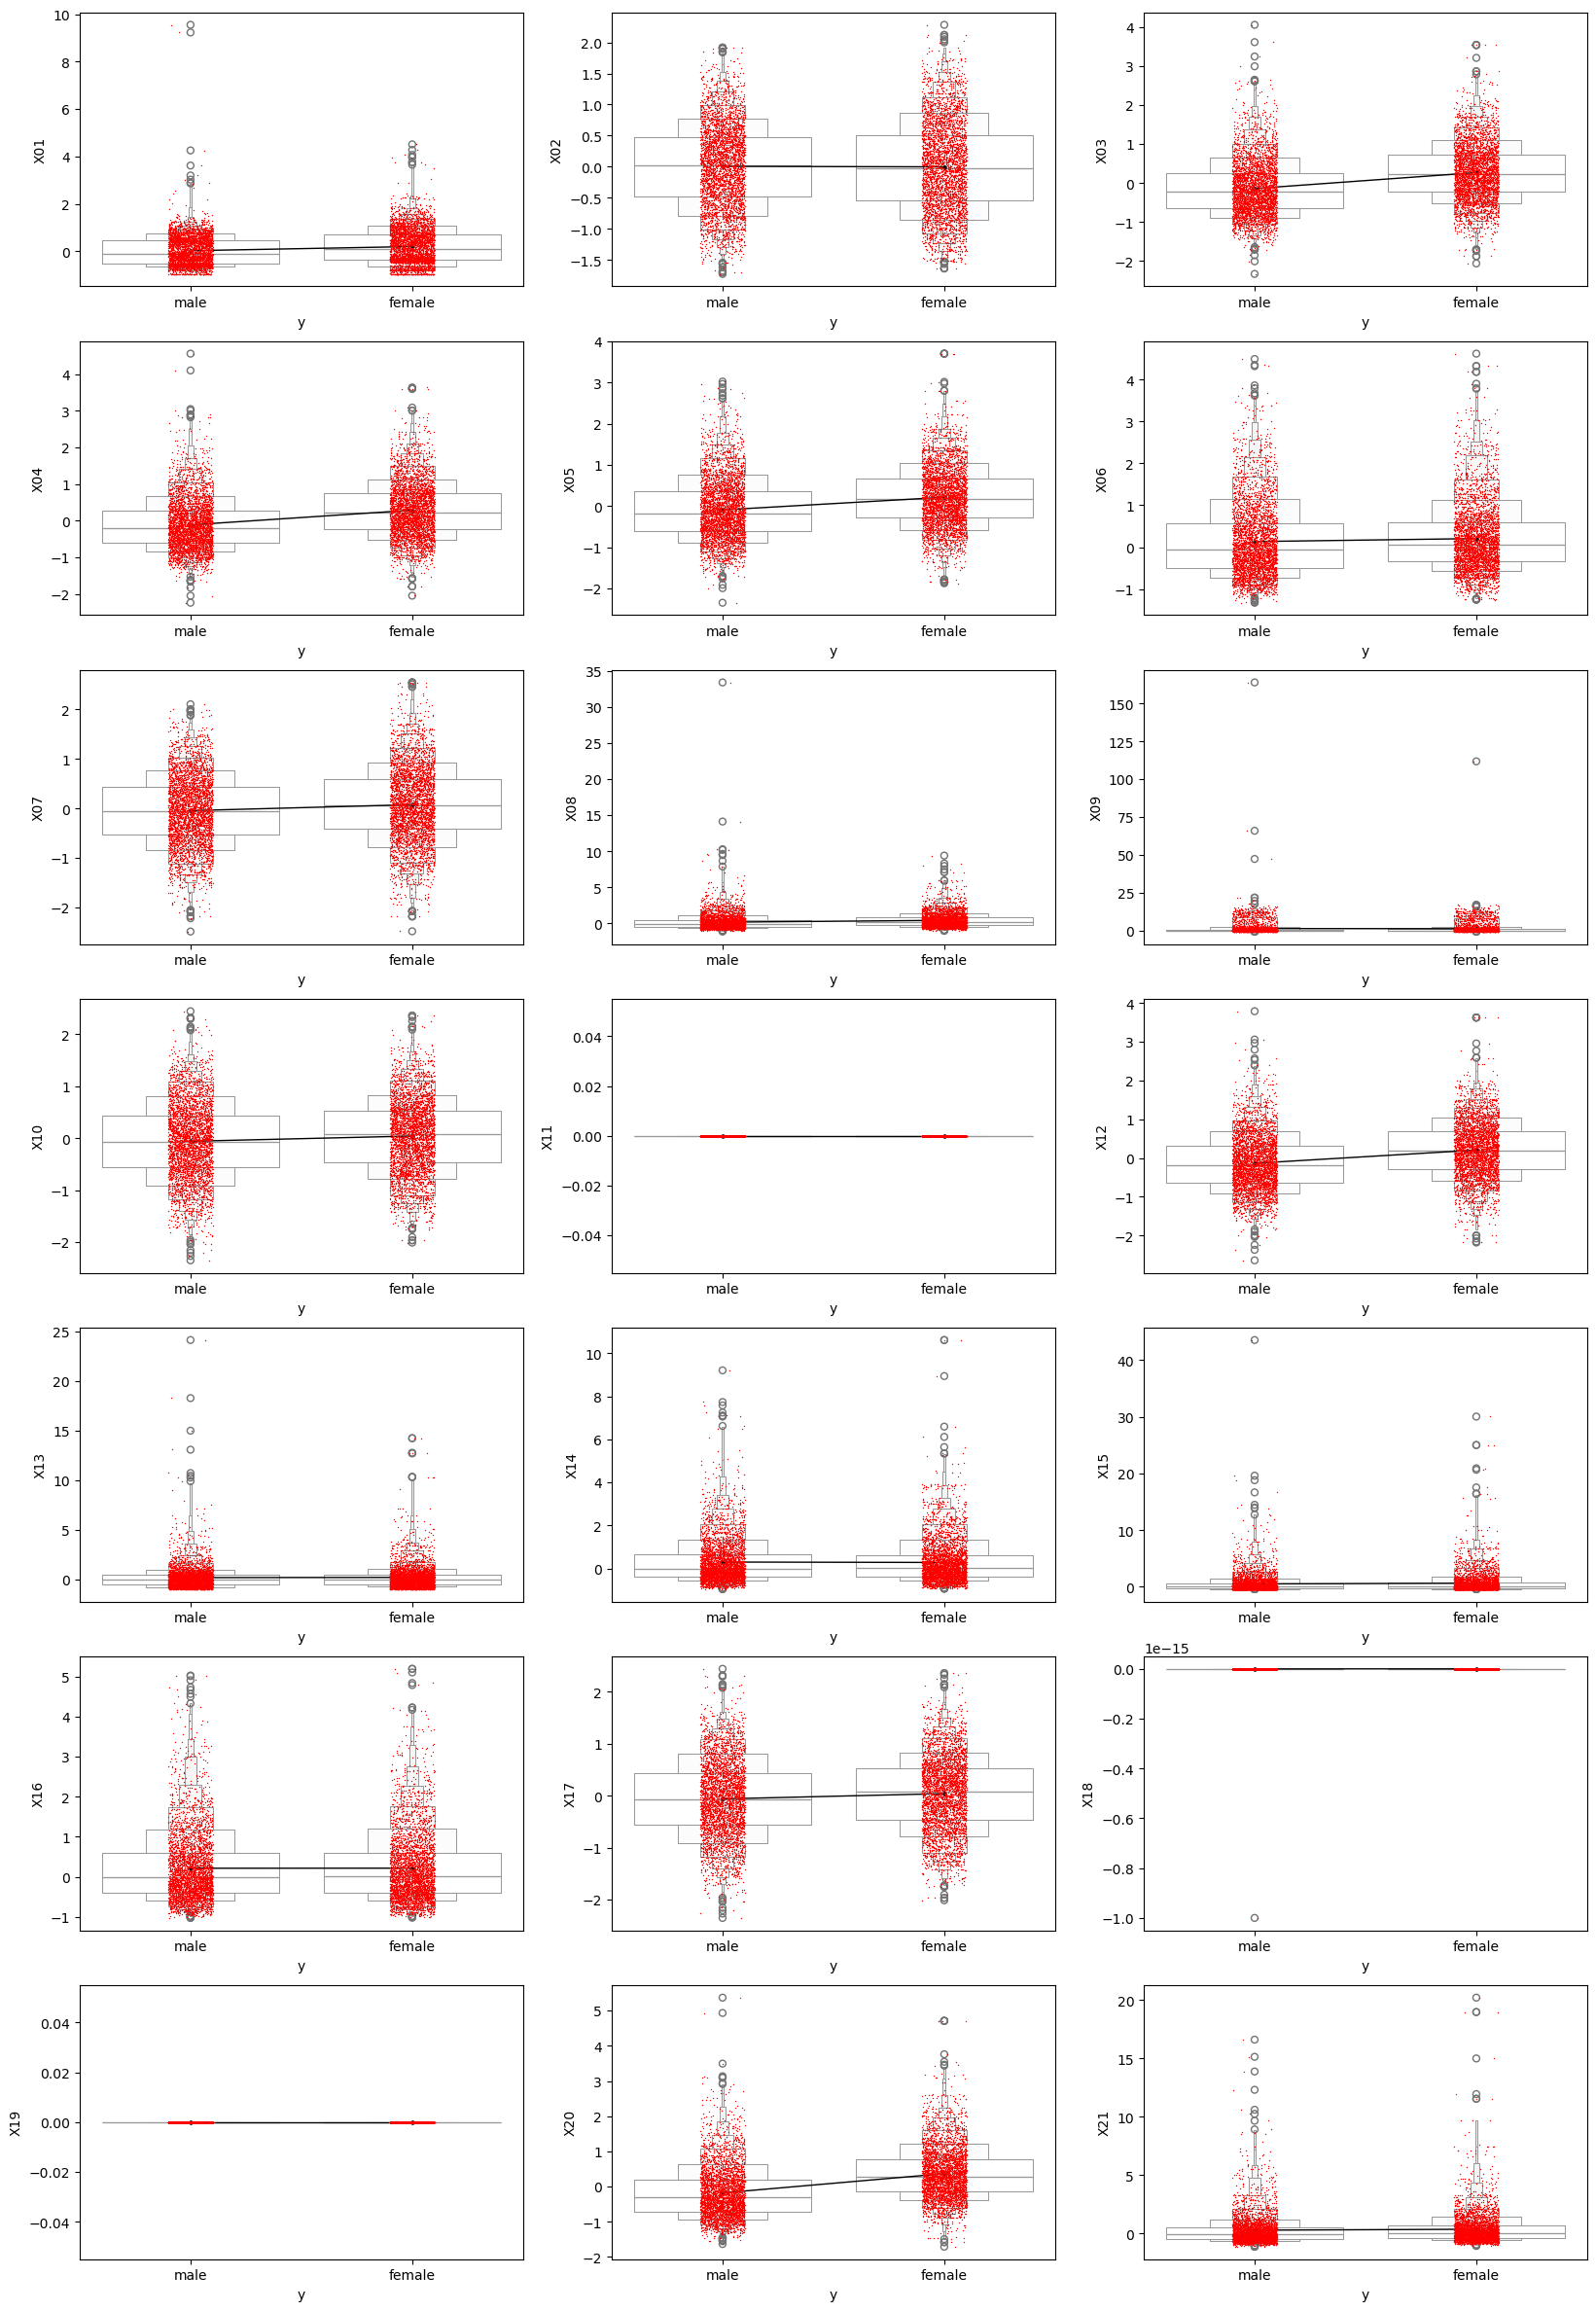

In [844]:
# subplot of y vs each X (stripplot + violinplot + boxenplot)
f1, axes = plt.subplots(fig_rows, fig_cols, figsize = figsize)
itr = 0
for x in X_cols:
  row = np.floor(itr/fig_cols) 
  row = row.astype('int')
  col = np.mod(itr, fig_cols)
  col = col.astype('int') 
  # print(row)
  # print(col)
  # p1 = sns.violinplot(ax = axes[row, col], data = df2, x = y_col, y = x, hue = y_col, palette = palette1)
  p2 = sns.boxenplot(ax = axes[row, col], data = df2, x = y_col, y = x, hue = y_col, palette = palette1)
  p3 = sns.stripplot(ax = axes[row, col], data = df2, x = y_col, y = x, color = c2, size = 1)
  p4 = sns.pointplot(ax = axes[row, col], data = df2, x = y_col, y = x, color = c5, linewidth = 1)
  axes[row, col].legend_ = None
  # axes[row, col].set_ylim(y_min, y_max)
  itr = itr + 1

## Feature Selection

### Remove Features Having % Similar Values or More

In [845]:
# porportion similar (p)
p = 1
# porportion dissimilar (q = 1- p)
q = 1 - p

print(p,q)

1 0


In [846]:
# initialize variance threshold model (based on porportion dissimilar)
myfit = VarianceThreshold(q)

In [847]:
# fit model
temp = myfit.fit_transform(df2[X_cols])
temp.shape

(7364, 19)

In [848]:
# get columns that have at least p-similar or q-disimilar values
X_cols_var_threshold = myfit.get_feature_names_out()
X_cols_var_threshold

array(['X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X20',
       'X21'], dtype=object)

In [849]:
# update X_cols
X_cols = X_cols_var_threshold
X_cols

array(['X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X20',
       'X21'], dtype=object)

### Select Features Using Model Selection Methods

In [850]:
# seperate data into X and y
X = df2[X_cols]
y = np.ravel(df2[y_col])

In [851]:
# estimator model
estimator_model = RandomForestClassifier(
  n_estimators = 10,
  max_depth = 100,
  criterion = 'gini',
  random_state = random_state
)    

In [852]:
# fit estimmator model
temp = estimator_model.fit(X, y)

In [853]:
# feature importance values
feature_importance = estimator_model.feature_importances_
feature_importance

array([0.05322342, 0.05652944, 0.07120433, 0.05734471, 0.0448016 ,
       0.04324479, 0.0988208 , 0.08913198, 0.04074804, 0.03412969,
       0.0441237 , 0.03406546, 0.026742  , 0.03381265, 0.0320632 ,
       0.03507346, 0.        , 0.15749926, 0.04744147])

In [854]:
# threshold feature importance
feature_importance_threshold = np.mean(feature_importance)
# feature_importance_threshold = np.median(feature_importance)
# feature_importance_threshold = np.quantile(feature_importance, q = 0.5)
feature_importance_threshold

0.05263157894736842

In [855]:
# initialize SelectFromModel
myfit = SelectFromModel(
  estimator = estimator_model,
  threshold = feature_importance_threshold
)

In [856]:
# fit SelectFromModel
temp = myfit.fit_transform(X, y)

In [857]:
# get columns kept from ensemble - random forest feature selection
X_cols_rf = myfit.get_feature_names_out()
X_cols_rf

array(['X01', 'X02', 'X03', 'X04', 'X07', 'X08', 'X20'], dtype=object)

## Train and Test ML Model

In [858]:
# X_cols to include after feature selection
# X_include = X.columns
X_include = X_cols_rf
print(len(X_include))
print(X_include)

7
['X01' 'X02' 'X03' 'X04' 'X07' 'X08' 'X20']


In [859]:
# split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X[X_include], y, 
  stratify = y, shuffle = True, 
  train_size = 0.7, random_state = random_state
)

In [860]:
# initialize Random Forest model
myfit = RandomForestClassifier(
  criterion = 'log_loss',
  # min_samples_split = 10,
  random_state = random_state
)

In [861]:
# fit model
temp = myfit.fit(X_train, y_train)

In [862]:
# get predictions on test data
y_hat = myfit.predict(X_test)

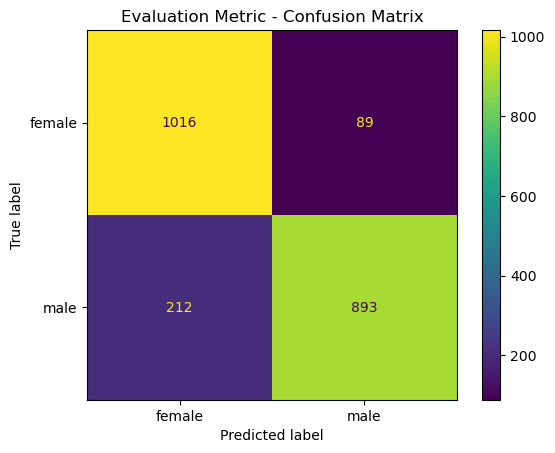

In [863]:
# model evaluation - confusion matrix

# get confusion matrix
cm = confusion_matrix(
  y_true = y_test,
  y_pred = y_hat
)

# show confusion matrix visual
labels = myfit.classes_
p1 = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
p1.plot()
plt.title('Evaluation Metric - Confusion Matrix')
plt.show()

In [864]:
# model evaluation - recall, precision , F1-score
metric_report = classification_report(y_true = y_test, y_pred = y_hat, output_dict = False, zero_division = 0) 
print(metric_report)

              precision    recall  f1-score   support

      female       0.83      0.92      0.87      1105
        male       0.91      0.81      0.86      1105

    accuracy                           0.86      2210
   macro avg       0.87      0.86      0.86      2210
weighted avg       0.87      0.86      0.86      2210

